In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
emissions_df = pd.read_csv('emissions.csv', encoding='latin-1')
emissions_df.head()

,Unnamed: 0,year,province,party,emissions
0,0,2015,Alberta,Conservative,1.360464e+08
1,1,2015,British Columbia,Liberal,1.191452e+07
2,2,2015,Manitoba,Conservative,1.490384e+06
3,3,2015,New Brunswick,Liberal,7.146915e+06
4,4,2015,Newfoundland and Labrador,Liberal,4.673263e+06


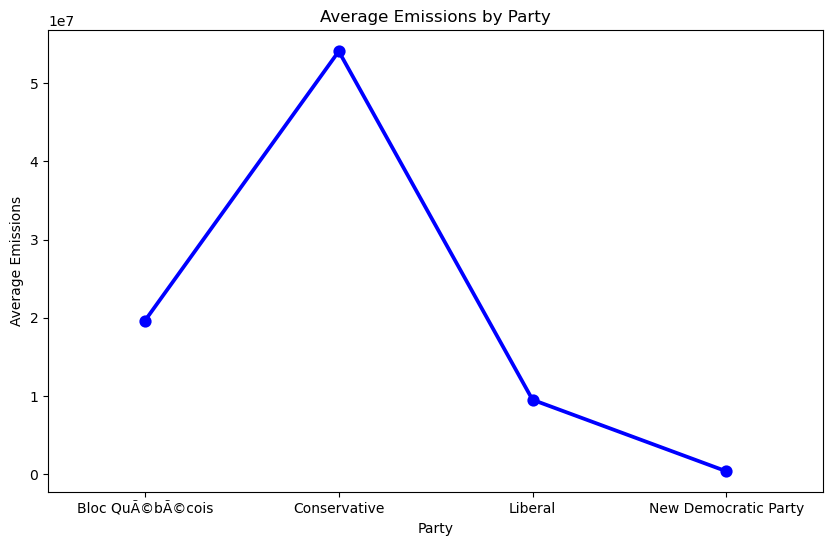

In [27]:
emissions_df_filtered = emissions_df[emissions_df['party'] != 'a']

avg_emissions_by_party = emissions_df_filtered.groupby('party')['emissions'].mean().reset_index()

# Plot using a point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='party', y='emissions', data=avg_emissions_by_party, color='blue', markers='o', linestyles='-', dodge=True)
plt.title('Average Emissions by Party')
plt.xlabel('Party')
plt.ylabel('Average Emissions')
plt.show()

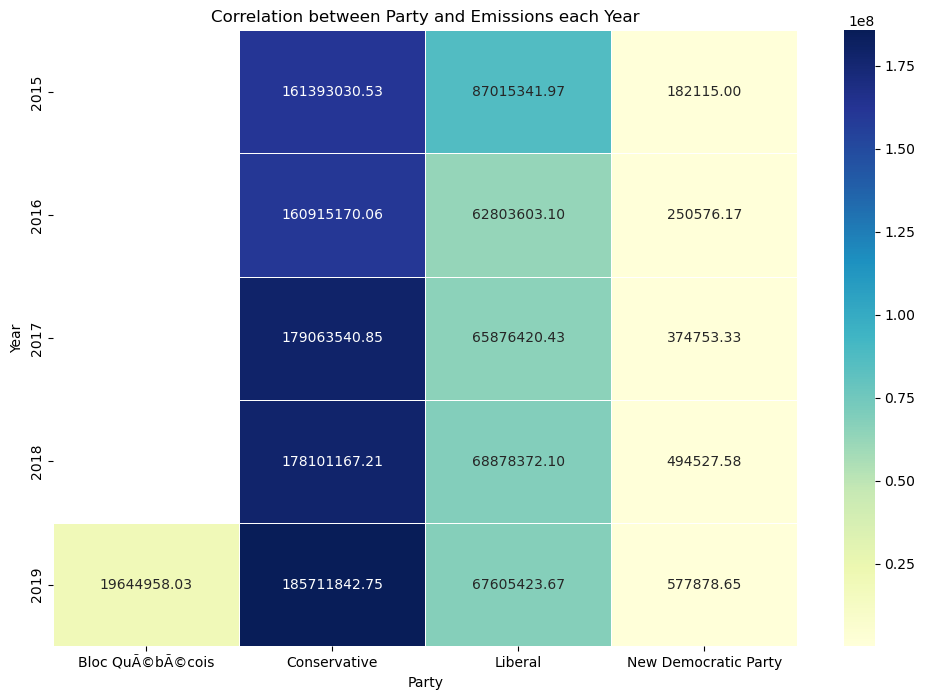

In [28]:
pivot_table = emissions_df_filtered.pivot_table(values='emissions', index='year', columns='party', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation between Party and Emissions each Year')
plt.xlabel('Party')
plt.ylabel('Year')
plt.show()


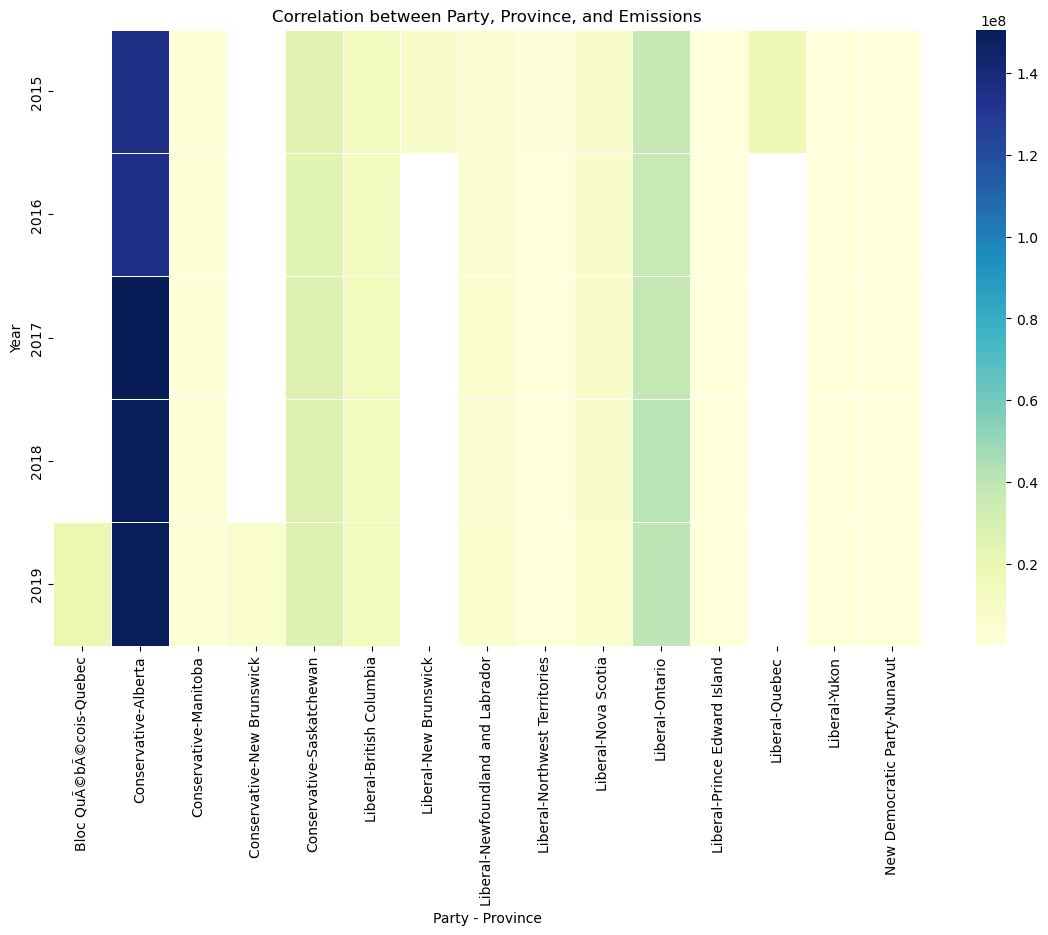

In [29]:
pivot_table = emissions_df_filtered.pivot_table(values='emissions', index='year', columns=['party', 'province'], aggfunc='sum')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False, fmt=".2f", linewidths=.5)
plt.title('Correlation between Party, Province, and Emissions')
plt.xlabel('Party - Province')
plt.ylabel('Year')
plt.show()

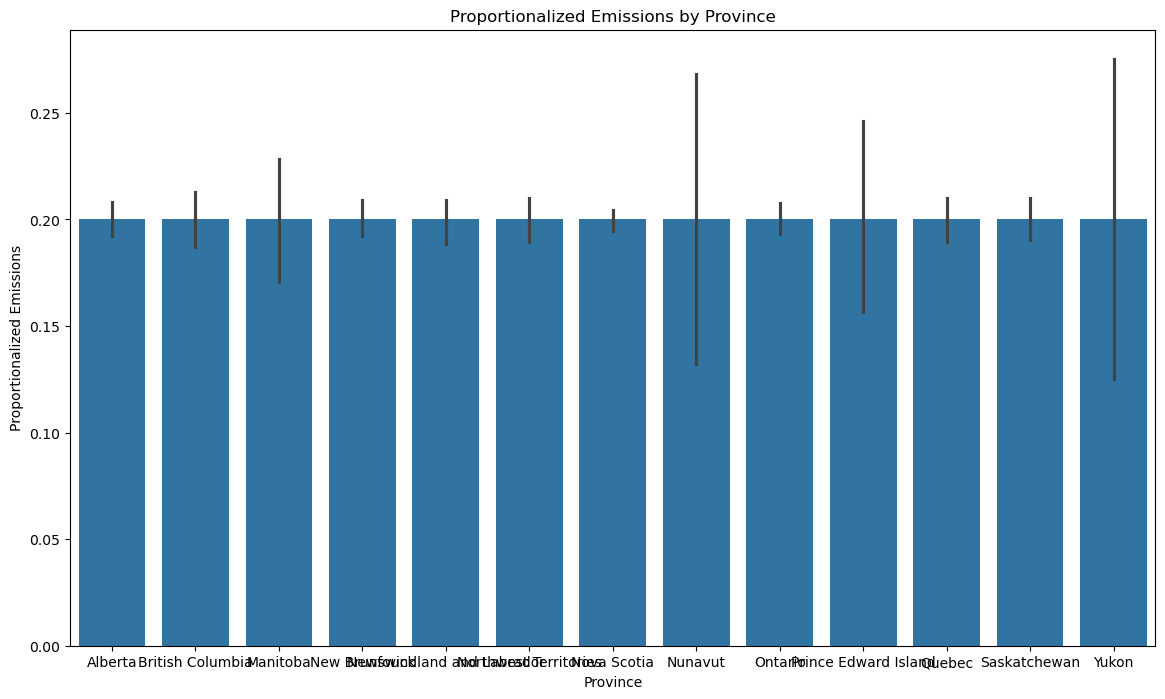

In [24]:
# Calculate proportionalized emissions (emissions per capita)
emissions_df['proportional_emissions'] = emissions_df['emissions'] / emissions_df.groupby('province')['emissions'].transform('sum')

plt.figure(figsize=(14, 8))
sns.barplot(x='province', y='proportional_emissions', data=emissions_df)
plt.title('Proportionalized Emissions by Province')
plt.xlabel('Province')
plt.ylabel('Proportionalized Emissions')
plt.show()
